# Задача 2.1

In [1]:
import numpy as np
import math as mth
import scipy.stats as sps
import matplotlib.pyplot as plt

N=10000
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Поиск оценок и построение графиков

Буду считать оценку плохой и исключать из рассмотрения, если максимум модуля разности ее и $\theta$, начиная со значения про n=1000 не меньше $\theta/2$, это точно избавит от оценок с большим отклонением, не стремящихся к $\theta$ при $n -> \inf$ (проверено эмпирически)

In [2]:
def normal_graph(tetta):
    sample = sps.uniform.rvs(size=N, loc=0, scale=tetta)
    
    #поиск оценок
    eval1 = list()
    eval2 = list()
    eval3 = list()
    eval4 = list()
    eval5 = list()
    n = 1;
    while n<10000:
        n+=1
        eval1.append(abs(2*sample[:n].mean() - tetta))
        eval2.append(abs(sample[:n].mean()+sample[:n].max()/2 - tetta))
        eval3.append(abs((n+1)*sample[:n].min() - tetta))
        eval4.append(abs(sample[:n].min()+sample[:n].max() - tetta))
        eval5.append(abs(sample[:n].max()*(n+1)/n - tetta))
    
    #построение графиков  
    plt.figure(figsize=(15, 10))
    grid = np.arange(1, N)
    if(max(eval1[1000:]) < tetta/2):
        plt.plot(grid, eval1, color='blue', linewidth=1, label=r'2$\overline{X}$')
    else:
        print('2X - плохая оценка')
    if(max(eval2[1000:]) < tetta/2):
        plt.plot(grid, eval2, color='red', linewidth=1, label=r'2$\overline{X} + \frac{X_{(n)}}{2}$')
    else:
        print('2X + X_(n)/2 - плохая оценка')
    if(max(eval3[1000:]) < tetta/2):
        plt.plot(grid, eval3, color='brown', linewidth=1, label=r'$(n+1)X_{(1)}$')
    else:
        print('(n+1)X_(1) - плохая оценка')
    if(max(eval4[1000:]) < tetta/2):
        plt.plot(grid, eval4, color='yellow', linewidth=2, label=r'$X_{(1)}+X_{(n)}$')
    else:
        print('X_(1) + X_(n) - плохая оценка')
    if(max(eval5[1000:]) < tetta/2):
        plt.plot(grid, eval5, color='green', linewidth=1, label=r'$\frac{n+1}{n}X_{(n)}$')
    else:
        print('(n+1)/n*X_(n) - плохая оценка')
    plt.legend()
    plt.xlim((1, N))
    plt.xlabel('n')
    plt.ylabel(r'$|\theta^* - \theta|$')
    plt.title(r'$\theta = $'+ str(tetta))
    plt.ylim((0, tetta/8))
    
    #поиск лучшей оценки
    res = [eval1[-1], eval2[-1], eval3[-1], eval4[-1], eval5[-1]]
    if res[0]==min(res):
        print('Лучшая оценка - 2X')
    if res[1]==min(res):
        print('Лучшая оценка - 2X + X_(n)/2')
    if res[2]==min(res):
        print('Лучшая оценка - (n+1)X_(1)')
    if res[3]==min(res):
        print('Лучшая оценка - X_(1) + X_(n)')
    if res[4]==min(res):
        print('Лучшая оценка - (n+1)/n*X_(n)')
    plt.show()

#### Графики 

(n+1)X_(1) - плохая оценка
Лучшая оценка - (n+1)/n*X_(n)


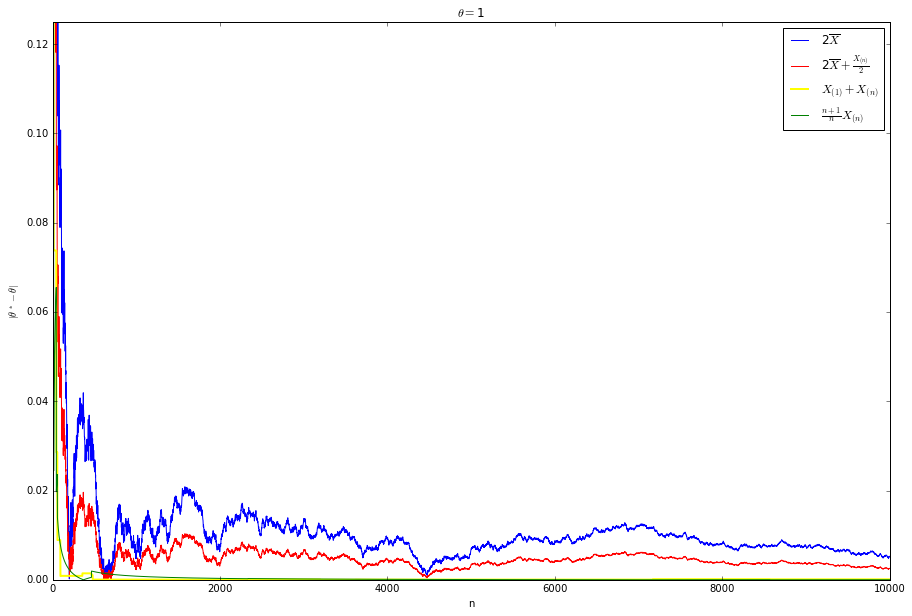

In [3]:
normal_graph(1)

(n+1)X_(1) - плохая оценка
Лучшая оценка - X_(1) + X_(n)


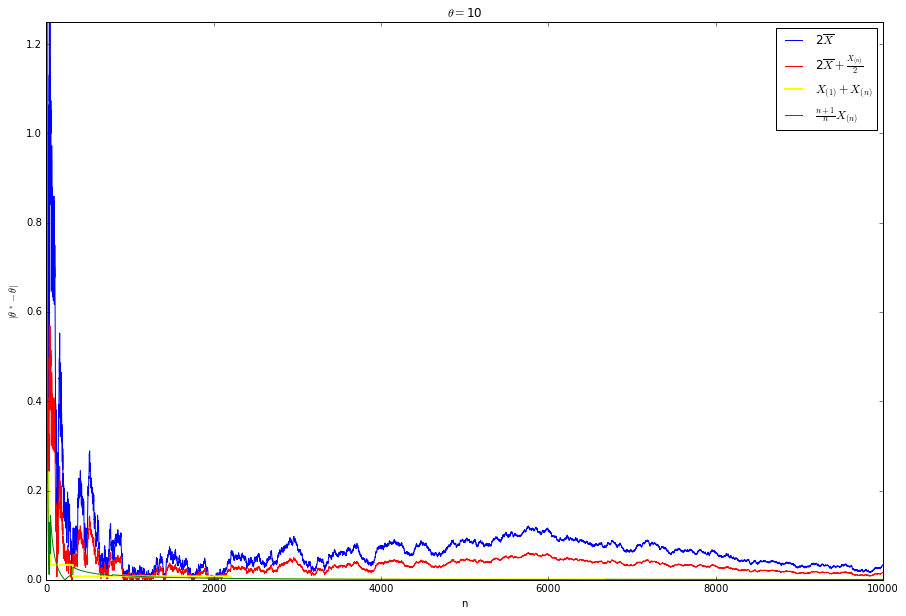

In [4]:
normal_graph(10)

(n+1)X_(1) - плохая оценка
Лучшая оценка - (n+1)/n*X_(n)


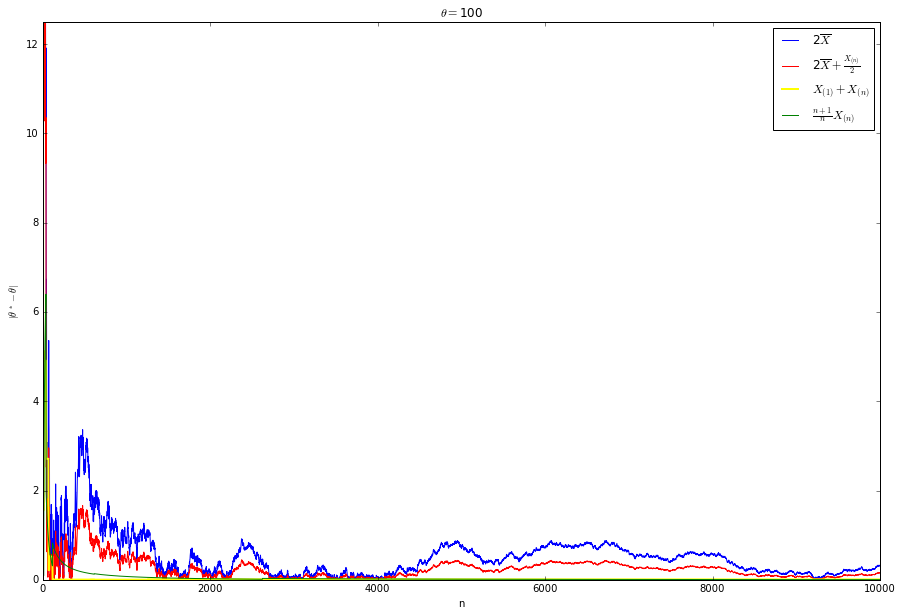

In [5]:
normal_graph(100)

(n+1)X_(1) - плохая оценка
Лучшая оценка - X_(1) + X_(n)


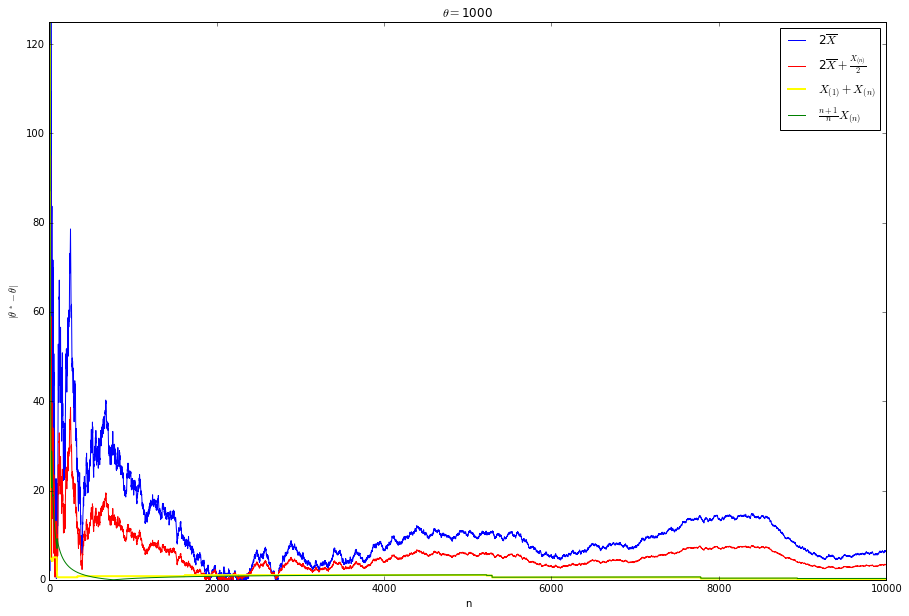

In [6]:
normal_graph(1000)

(n+1)X_(1) - плохая оценка
Лучшая оценка - X_(1) + X_(n)


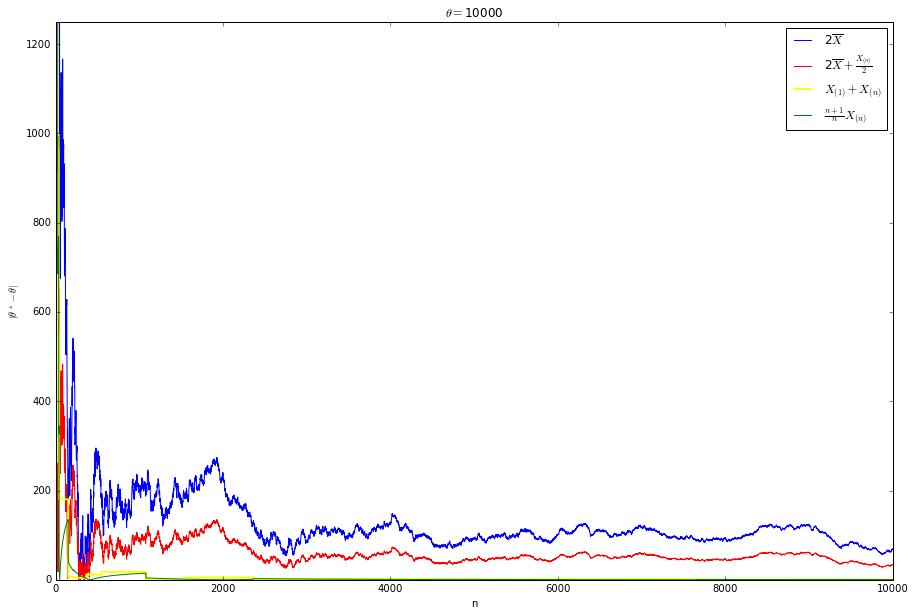

In [7]:
normal_graph(10000)

$Можно\ сделать\ вывод,\ что\ оценка\ (n+1)X_{(1)}\ всегда\ сильно\ отличается\ от\ истинного\ значения\ \theta\ (что\ доказывает,\ что\ состоятельность\\ оценки\ -\ более\ полезное\ свойство,\ чем\ несмещенность),\ лучшей\ оценкой\ всегда\ оказывается\ X_{(1)}+X_{(n)}\ или\ \frac{n+1}{n}X_{(n)}.$